# NL COVID 19 data exploration

- data from https://data.rivm.nl/covid-19/
- taken 19 July 2020

## Notes

- Given that daily reported numbers are in small quantities
(i.e. <100), changes represented in % changes
can be highly sensitive.
E.g. Changing from 1 to 5 is a 500% change.
- But % change is the only way to
compare change in qty across different slices
of data.
- So take those figures with a pinch of salt.
- That being said, we are looking for anomalies,
so a sufficiently large % change would signal
an abnormally large change.
- (Also, because I've just slapped this together in a
few hours + re-learning how to use pandas/matplotlib,
so i haven't put together a way to quickly
compare % change across many more slices of data -- see todo)

## todo

- helper functions to dry code
- plot graph that shows week-on-week daily % increase
- plot that graph for every week since beginning of data

In [44]:
import pandas as pd
import os
from matplotlib.pyplot import grid,plot, xticks,yticks,legend
import numpy as np

_DATADIR="../_data"

# There are two datasets
# _DATA_CASES is a CSV file containing data on nationally reported cases
# _DATA_CUMUL contains data on cumulative infections, hospitalizations, deaths
#_DATA_CASES="COVID-19_casus_landelijk.csv"
_DATA_CUMUL="COVID-19_aantallen_gemeente_cumulatief.csv"

#cases = pd.read_csv(os.path.join(_DATADIR, _DATA_CASES), delimiter=";")
cumul = pd.read_csv(os.path.join(_DATADIR, _DATA_CUMUL), delimiter=";")

In [45]:
# NOT USED YET
#cases_ams = cases[cases["Municipal_health_service"].isin(["GGD Amsterdam"])]
#cases_ams.tail()

We want only cases from Amsterdam:

In [46]:
cumul_ams = cumul[cumul["Municipality_name"].isin(["Amsterdam"])]

## Cumulative reported cases for the last 30 days

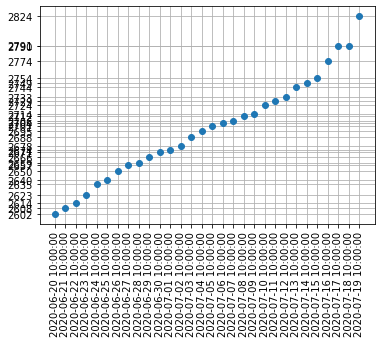

In [47]:
# figure for last 30 days
cumul_ams_dates = cumul_ams["Date_of_report"].tail(30)
cumul_ams_reported = cumul_ams["Total_reported"].tail(30)

from matplotlib.pyplot import plot_date

grid(True)
xticks(rotation="vertical")
yticks(cumul_ams_reported)
plot_date(cumul_ams_dates, cumul_ams_reported,xdate=True )


In [48]:
# figure for last 30 days
cumul_ams_dates_last7 = cumul_ams["Date_of_report"][-7:]
cumul_ams_reported_last7 = cumul_ams["Total_reported"][-7:]
cumul_ams_dates_prev7 = cumul_ams["Date_of_report"][-14:-7]
cumul_ams_reported_prev7 = cumul_ams["Total_reported"][-14:-7]
cumul_ams_dates_3weeks = cumul_ams["Date_of_report"][-21:-14]
cumul_ams_reported_3weeks = cumul_ams["Total_reported"][-21:-14]

# format dates so we can overlay the plots
import datetime

cumul_ams_dates_last7_dt = [datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S').date() for d in cumul_ams_dates_last7.to_list()]
cumul_ams_dates_prev7_dt = [datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S').date() for d in cumul_ams_dates_prev7.to_list()]
cumul_ams_dates_3weeks_dt = [datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S').date() for d in cumul_ams_dates_3weeks.to_list()]

concat_dates = []
for i in range(0,7):
    concat_dates.append(f"{cumul_ams_dates_last7_dt[i]}/{cumul_ams_dates_prev7_dt[i]}/{cumul_ams_dates_3weeks_dt[i]}")

# days = ["Monday","Tuesday","Wednesday","Thursday","Friday", "Saturday", "Sunday"]
cumul_ams_dates_last7_dt

[datetime.date(2020, 7, 13),
 datetime.date(2020, 7, 14),
 datetime.date(2020, 7, 15),
 datetime.date(2020, 7, 16),
 datetime.date(2020, 7, 17),
 datetime.date(2020, 7, 18),
 datetime.date(2020, 7, 19)]

## Overlaying reported cases for last 21 days

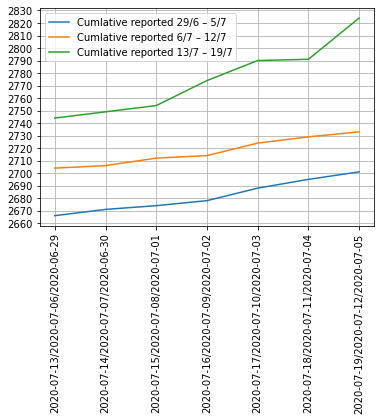

In [49]:
grid(True)
xticks(np.arange(0,7,step=1),rotation="vertical")
yticks(np.arange(1000,2900,step=10))
plot(concat_dates, cumul_ams_reported_3weeks,label="Cumlative reported 29/6 – 5/7")
plot(concat_dates, cumul_ams_reported_prev7, label="Cumlative reported 6/7 – 12/7")
plot(concat_dates, cumul_ams_reported_last7, label="Cumlative reported 13/7 – 19/7")

legend()

Last week's numbers

In [50]:
tmp_df = pd.DataFrame([cumul_ams["Date_of_report"],cumul_ams["Total_reported"]],["Date_of_report","Total_reported"]).transpose()
last7 = tmp_df[-8:]
last7

,Date_of_report,Total_reported
44516,2020-07-12 10:00:00,2733
44883,2020-07-13 10:00:00,2744
45250,2020-07-14 10:00:00,2749
45617,2020-07-15 10:00:00,2754
45984,2020-07-16 10:00:00,2774
46351,2020-07-17 10:00:00,2790
46718,2020-07-18 10:00:00,2791
47085,2020-07-19 10:00:00,2824


In [51]:
last7_reported = last7["Total_reported"].to_list()
last7_daily_incrm = []
for i in range(0,len(last7_reported)):
    if i >0:
        last7_daily_incrm.append(
            last7_reported[i]-last7_reported[i-1]
            )

last7_daily_incrm

[11, 5, 5, 20, 16, 1, 33]

So we can see that last week's numbers:

- Increased from 2744 to 2824 -- +80
-

### Previous week's numbers

In [52]:
tmp_df[-15:-7]

,Date_of_report,Total_reported
41947,2020-07-05 10:00:00,2701
42314,2020-07-06 10:00:00,2704
42681,2020-07-07 10:00:00,2706
43048,2020-07-08 10:00:00,2712
43415,2020-07-09 10:00:00,2714
43782,2020-07-10 10:00:00,2724
44149,2020-07-11 10:00:00,2729
44516,2020-07-12 10:00:00,2733


In [53]:
prev7_reported = tmp_df["Total_reported"][-15:-7].to_list()
prev7_daily_incrm = []
for i in range(0,len(prev7_reported)):
    if i >0:
        prev7_daily_incrm.append(
            prev7_reported[i]-prev7_reported[i-1]
            )

prev7_daily_incrm

[3, 2, 6, 2, 10, 5, 4]

In [54]:
last3weeks = tmp_df[-22:-14]

last3weeks_reported = last3weeks["Total_reported"].to_list()
last3weeks_daily_incrm = []
for i in range(0,len(last3weeks_reported)):
    if i >0:
        last3weeks_daily_incrm.append(
            last3weeks_reported[i]-last3weeks_reported[i-1]
            )

last3weeks_daily_incrm

[7, 5, 3, 4, 10, 7, 6]

### Daily increase in cases, week on week:

In [55]:
week_on_week_incrm_percent = []
for i in range(0,len(prev7_daily_incrm)):
    week_on_week_incrm_percent.append(
        last7_daily_incrm[i]/prev7_daily_incrm[i]*100
    )

week_on_week_incrm_percent

[366.66666666666663, 250.0, 83.33333333333334, 1000.0, 160.0, 20.0, 825.0]

### 3 weeks ago vs last week

In [56]:
week_on_week_incrm_percent_3weeks = []
for i in range(0,len(prev7_daily_incrm)):
    week_on_week_incrm_percent_3weeks.append(
        prev7_daily_incrm[i]/last3weeks_daily_incrm[i]*100
    )

week_on_week_incrm_percent_3weeks

[42.857142857142854,
 40.0,
 200.0,
 50.0,
 100.0,
 71.42857142857143,
 66.66666666666666]

### Plot daily increase for 3 weeks

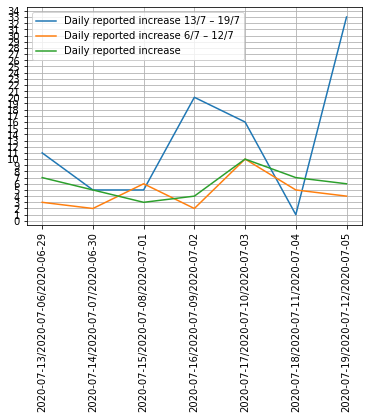

In [57]:
grid()
xticks(np.arange(0,7,step=1),rotation="vertical")
yticks(np.arange(0,40,step=1))
plot(concat_dates,last7_daily_incrm,label="Daily reported increase 13/7 – 19/7")
plot(concat_dates,prev7_daily_incrm,label="Daily reported increase 6/7 – 12/7")
plot(concat_dates,last3weeks_daily_incrm, label="Daily reported increase ")
legend()

### Total reported cases increase, week on week:

In [58]:
sum(last7_daily_incrm)/sum(prev7_daily_incrm)*100

284.375

In [59]:
sum(prev7_daily_incrm)/sum(last3weeks_daily_incrm)*100

76.19047619047619